# Highest Rated Movie in 2020

For the first part, we will try to determine which movie has the highest rating in 2020. To do this, we can just load the <code>title_basics.tsv</code> and <code>title_ratings.tsv</code> and map the corresponding rating per movie.

#### Objectives:

- Filter the datasets with <code>titleType</code> equal to <code>movie</code>, and <code>startYear</code> equal to <code>2020</code>.
- Map the values according to <code>tconst</code>
- Sort the data in descending order

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_movies = []
df_ratings = []
df_principals = []
df_name = []

In [3]:
title_basics_col_list = ["tconst", "titleType", "primaryTitle", "startYear"]
iter_movies = pd.read_csv('title_basics.tsv', sep='\t', usecols=title_basics_col_list, iterator=True, chunksize=10000)
df_movies = pd.concat([chunk[(chunk['startYear']=="2020") & (chunk['titleType']=="movie")] for chunk in iter_movies])
df_movies.drop(['titleType', 'startYear'], inplace=True, axis=1)
df_movies = df_movies.reset_index(drop=True)
df_movies.head()

,tconst,primaryTitle
0,tt0062336,The Tango of the Widower and Its Distorting Mi...
1,tt0093119,Grizzly II: Revenge
2,tt0293513,"Pit Bull: A Tale of Lust, Murder and Revenge"
3,tt0368133,The Promise of Perfume
4,tt0438755,About Face: The Story of the Jewish Refugee So...


In [4]:
iter_ratings = pd.read_csv('title_ratings.tsv', sep='\t', iterator=True, chunksize=10000)
df_ratings = pd.concat([chunk for chunk in iter_ratings])
df_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1892
1,tt0000002,5.9,252
2,tt0000003,6.5,1682
3,tt0000004,5.7,165
4,tt0000005,6.2,2499


In [5]:
df_title_score = pd.merge(df_movies,df_ratings,how='left',on='tconst')
df_title_score.head()

,tconst,primaryTitle,averageRating,numVotes
0,tt0062336,The Tango of the Widower and Its Distorting Mi...,6.4,161.0
1,tt0093119,Grizzly II: Revenge,2.9,1225.0
2,tt0293513,"Pit Bull: A Tale of Lust, Murder and Revenge",NaN,NaN
3,tt0368133,The Promise of Perfume,6.6,8.0
4,tt0438755,About Face: The Story of the Jewish Refugee So...,8.4,33.0


In [6]:
sorted_df = df_title_score.sort_values(by=['averageRating', 'numVotes'], ascending=[False,False])
sorted_df.head()

,tconst,primaryTitle,averageRating,numVotes
8751,tt13388966,A Better Life,10.0,54.0
14052,tt8004936,A Step Without Feet,10.0,33.0
9135,tt13479840,North,10.0,6.0
12533,tt19812758,In the Name of Zion,10.0,5.0
9995,tt13743934,The Kobe Bryant Documentary: Life Lessons,9.9,20.0


From the results, we can say that <b>A Better Life</b> is the highest rated movie of 2020 at 10.0. However, it only garnered 54 votes from users. This may not be a valid conclusion because the number of votes is statistically insigificant compared to other movies.

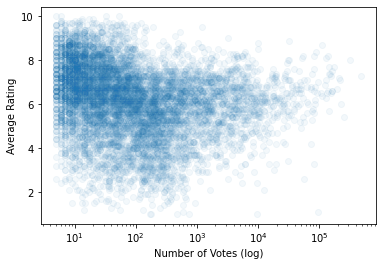

In [7]:
plt.scatter(df_title_score['numVotes'], df_title_score['averageRating'], alpha = 0.05)
plt.xlabel("Number of Votes (log)")
plt.ylabel("Average Rating")
plt.xscale("log")
plt.show()



We can observe from this figure that the number of votes garnered by movies have a large range. This means that some movies got more 'attention' as compared to others. To account for this, we can set a minimum requirement for <code>numVotes</code> for a movie to be qualified to be judged if it is high-rated.

In [8]:
minVotes = 100000
df_title_score = df_title_score[df_title_score['numVotes']>=minVotes]
sorted_df = df_title_score.sort_values(by=['averageRating', 'numVotes'], ascending=[False,False])
sorted_df.head()

,tconst,primaryTitle,averageRating,numVotes
192,tt10189514,Soorarai Pottru,8.7,110958.0
307,tt10272386,The Father,8.2,138697.0
14112,tt8110330,Dil Bechara,8.1,129083.0
12753,tt2948372,Soul,8.0,312686.0
966,tt1070874,The Trial of the Chicago 7,7.7,172496.0


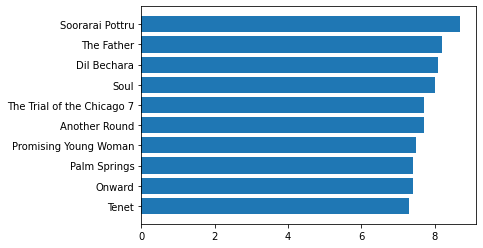

In [9]:
topN = 10
values = sorted_df['averageRating'][:topN]
names = sorted_df['primaryTitle'][:topN]
plt.barh(range(topN), values, tick_label=names)
plt.gca().invert_yaxis()
plt.show()

By setting a minimum requirement in the number of votes, we can say that <b>Soorarai Pottru</b> is the highest rated movie of 2020.

The imdb rating is calculated as the weighted average of the user-rating and the imdb top moves rating. This is due to the fact that movies will receive different number of votes in the rating. Hence, to say that a movie is qualified to be popular, we must normalize the average rating by factoring in the percentage of votes that a movie obtained. This can be done by multiplying the <code>averageRating</code> by the <code>numVotes</code>.

In [10]:
df_title_score['totalScore'] = df_title_score['averageRating'] * df_title_score['numVotes']
sorted_df = df_title_score.sort_values(by=['totalScore'], ascending=False)
sorted_df.head()

,tconst,primaryTitle,averageRating,numVotes,totalScore
13497,tt6723592,Tenet,7.3,472797.0,3451418.1
12753,tt2948372,Soul,8.0,312686.0,2501488.0
691,tt1051906,The Invisible Man,7.1,219357.0,1557434.7
14225,tt8332922,A Quiet Place Part II,7.2,212534.0,1530244.8
13629,tt7126948,Wonder Woman 1984,5.4,257408.0,1390003.2


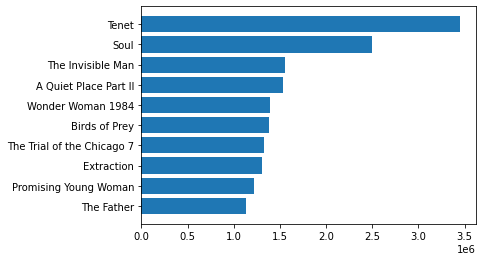

In [11]:
topN = 10
values = sorted_df['totalScore'][:topN]
names = sorted_df['primaryTitle'][:topN]
plt.barh(range(topN), values, tick_label=names)
plt.gca().invert_yaxis()
plt.show()

From the results, we can say that <b>Tenet</b> is the highest rated movie of 2020 because it received the highest cumulative score among all the movies.

# Most Popular Actor of 2020

For the second part, we will determine the most popular actor of 2020. To do this, we can just load the <code>title_principals.tsv</code> corresponding rating per movie that an actor plays using the previously loaded datasets.

#### Objectives:

- Filter the datasets with <code>category</code> equal to <code>actor</code> or <code>actress</code>
- Map the values according to <code>tconst</code>
- Sort the data in descending order according to their accumulated score
- Sort the data in ascending order according to their ordering in the movie

In [12]:
df_principals =[]
title_principals_col_list = ["tconst", "ordering", "nconst", "category"]
iter_csv = pd.read_csv('title_principals.tsv', sep='\t', usecols = title_principals_col_list, iterator=True, chunksize=10000)
df_principals = pd.concat([chunk[(chunk['category']=="actor")|((chunk['category']=="actress"))] for chunk in iter_csv])
df_principals = df_principals.reset_index(drop=True)
df_principals.head()

,tconst,ordering,nconst,category
0,tt0000005,1,nm0443482,actor
1,tt0000005,2,nm0653042,actor
2,tt0000007,1,nm0179163,actor
3,tt0000007,2,nm0183947,actor
4,tt0000008,1,nm0653028,actor


In [13]:
df_principals_year = pd.merge(df_movies,df_principals,how='left',on='tconst')
df_principals_year.head()

,tconst,primaryTitle,ordering,nconst,category
0,tt0062336,The Tango of the Widower and Its Distorting Mi...,1.0,nm0815612,actor
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2.0,nm1860495,actress
2,tt0062336,The Tango of the Widower and Its Distorting Mi...,3.0,nm0016013,actor
3,tt0062336,The Tango of the Widower and Its Distorting Mi...,4.0,nm0739834,actress
4,tt0093119,Grizzly II: Revenge,1.0,nm0000123,actor


In [14]:
df_principals_ratings = pd.merge(df_principals_year,df_ratings,how='left',on='tconst')
df_principals_ratings.head()

,tconst,primaryTitle,ordering,nconst,category,averageRating,numVotes
0,tt0062336,The Tango of the Widower and Its Distorting Mi...,1.0,nm0815612,actor,6.4,161.0
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2.0,nm1860495,actress,6.4,161.0
2,tt0062336,The Tango of the Widower and Its Distorting Mi...,3.0,nm0016013,actor,6.4,161.0
3,tt0062336,The Tango of the Widower and Its Distorting Mi...,4.0,nm0739834,actress,6.4,161.0
4,tt0093119,Grizzly II: Revenge,1.0,nm0000123,actor,2.9,1225.0


In [15]:
name_basics_col_list = ["nconst", "primaryName"]
iter_name = pd.read_csv('name_basics.tsv', sep='\t', usecols = name_basics_col_list, chunksize=10000)
df_name = pd.concat(chunk for chunk in iter_name)
df_name.head()

,nconst,primaryName
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman


Similar to determining the Highest Rated Movie, we cannot solely rely on the average rating of the movie an actore is in to determine his/her popularity. Instead, we would want to determine the total accumulated score by an actor/actress as a metric to measure their popularity.

In [16]:
df_principals_ratings_names = pd.merge(df_principals_ratings,df_name,how='left',on='nconst')
df_principals_ratings_names['totalScore'] = df_principals_ratings_names['averageRating'] * df_principals_ratings_names['numVotes']
df_principals_ratings_names.head()

,tconst,primaryTitle,ordering,nconst,category,averageRating,numVotes,primaryName,totalScore
0,tt0062336,The Tango of the Widower and Its Distorting Mi...,1.0,nm0815612,actor,6.4,161.0,Rubén Sotoconil,1030.4
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2.0,nm1860495,actress,6.4,161.0,Claudia Paz,1030.4
2,tt0062336,The Tango of the Widower and Its Distorting Mi...,3.0,nm0016013,actor,6.4,161.0,Luis Alarcón,1030.4
3,tt0062336,The Tango of the Widower and Its Distorting Mi...,4.0,nm0739834,actress,6.4,161.0,Shenda Román,1030.4
4,tt0093119,Grizzly II: Revenge,1.0,nm0000123,actor,2.9,1225.0,George Clooney,3552.5


In [17]:
aggregatedScore = df_principals_ratings_names.groupby(['primaryName'])['totalScore'].agg('sum')
aggregatedScore.name = 'Score'
df_mergescore = pd.merge(df_principals_ratings_names, aggregatedScore, on='primaryName')
df_final = df_mergescore[['primaryName', 'primaryTitle', 'ordering', 'totalScore']]
#print(df_final.head())
sorted_df = df_final.sort_values(by = ['totalScore', 'ordering'], ascending=[False, True])
sorted_df.head(10)

,primaryName,primaryTitle,ordering,totalScore
37409,John David Washington,Tenet,1.0,3451418.1
37410,Robert Pattinson,Tenet,2.0,3451418.1
37411,Elizabeth Debicki,Tenet,3.0,3451418.1
37412,Juhan Ulfsak,Tenet,4.0,3451418.1
34917,Jamie Foxx,Soul,1.0,2501488.0
34919,Tina Fey,Soul,2.0,2501488.0
34920,Graham Norton,Soul,3.0,2501488.0
1912,Rachel House,Soul,4.0,2501488.0
2976,Elisabeth Moss,The Invisible Man,1.0,1557434.7
2978,Oliver Jackson-Cohen,The Invisible Man,2.0,1557434.7


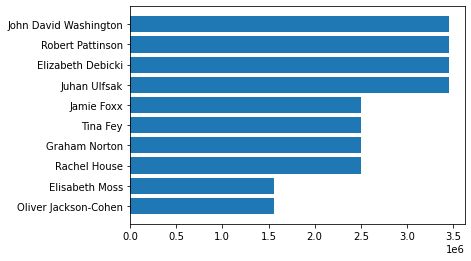

In [19]:
topN = 10
values = sorted_df['totalScore'][:topN]
names = sorted_df['primaryName'][:topN]
plt.barh(range(topN), values, tick_label=names)
plt.gca().invert_yaxis()
plt.show()

From the results, we can see that <b>John David Washington</b>, as the main character in the movie Tenet, garnered the highest total cumulative score for the year 2020. By this observation, we can say that he is the most popular actor of 2020.

### Conclusion:

If we will be basing on ratings and number of votes alone, the highest rated movie of 2020 is <b>A Better Life</b>. However, this is a statistically unfair measure since the movie received only few votes. By setting a minimum requirement for the number of votes equal to 100000, the highest rated movie of 2020 is <b>Soorarai Pottru</b>. Since the threshold is an arbitrary value, we can further extend our analysis and get the total accumulated score by each movie. The result of this showed that the movie with the highest accumulated score/rating of 2020 is <b>Tenet</b>.

Meanwhile, by analyzing the data of the artists for 2020, it is observed that <b>John David Washington</b> obtained the highest accumulated score in 2020 for the movie Tenet which supports the conclusion from the first part of the problem. Along with him, his other co-stars were also able to get a similar score for the year.